In [1]:
import numpy as np
from tensorflow.keras.models import Model, Sequential
from keras.layers import (
    GlobalAveragePooling2D,
    GlobalMaxPooling2D,
    Dense,
    Input,
    Dropout,
    BatchNormalization,
    Activation,
    Flatten,
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score,
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
from tqdm import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split
from keras.applications import resnet

In [2]:
shape = (150, 150, 3)
image_size = 150
path = "./Images/"

In [3]:
def read_images_from_directory(
    folder_path,
    desc,
):
    images = []
    labels = []

    for folder in os.listdir(folder_path):
        files = gb.glob(pathname=str(folder_path + "/" + folder + "/*.jpg"))

        for file in tqdm(files, desc=desc + " in " + folder):
            image = plt.imread(file)
            img_resized = cv2.resize(image, (image_size, image_size))
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            images.append(img_rgb)
            labels.append(folder)
    print(labels)
    return images, labels

In [4]:
x, y = read_images_from_directory(path, "Loading Data")

Loading Data in glioma_tumor:   0%|          | 0/4630 [00:00<?, ?it/s]

Loading Data in pituitary_tumor: 100%|██████████| 4504/4504 [00:23<00:00, 193.52it/s]

['glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma

In [5]:
x = np.array(x)

In [6]:
# Preprocess labels: convert to one-hot encoding
lb = LabelBinarizer()
y = lb.fit_transform(y)
print(y)

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [7]:
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=42
)

In [8]:
print(len(x_train))  # 60%
print(len(x_val))  # 20%
print(len(x_test))  # 20%

11290
3764
3764


In [9]:
model = Sequential()
model.add(Input(shape=shape))

ResNettt101 = resnet.ResNet101(weights="imagenet", include_top=False, input_shape=shape)

for layer in ResNettt101.layers:
    layer.trainable = False

model.add(ResNettt101)
model.add(GlobalMaxPooling2D())
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 5, 5, 2048)        42658176  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 43,709,316
Trainable params: 1,051,140
Non-trainable params: 42,658,176
_________________________________________________________________


In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
)

Epoch 1/10
353/353 [==============================] - 69s 158ms/step - loss: 1.3534 - accuracy: 0.7706 - val_loss: 0.5898 - val_accuracy: 0.8058
Epoch 2/10
353/353 [==============================] - 53s 149ms/step - loss: 0.3270 - accuracy: 0.8793 - val_loss: 0.3531 - val_accuracy: 0.8709
Epoch 3/10
353/353 [==============================] - 54s 152ms/step - loss: 0.2322 - accuracy: 0.9134 - val_loss: 0.2890 - val_accuracy: 0.8972
Epoch 4/10
353/353 [==============================] - 54s 153ms/step - loss: 0.1793 - accuracy: 0.9321 - val_loss: 0.2461 - val_accuracy: 0.9121
Epoch 5/10
353/353 [==============================] - 56s 160ms/step - loss: 0.1495 - accuracy: 0.9424 - val_loss: 0.2694 - val_accuracy: 0.9089
Epoch 6/10
353/353 [==============================] - 56s 159ms/step - loss: 0.1438 - accuracy: 0.9450 - val_loss: 0.3609 - val_accuracy: 0.8757
Epoch 7/10
353/353 [==============================] - 55s 156ms/step - loss: 0.1240 - accuracy: 0.9543 - val_loss: 0.2466 - val_ac

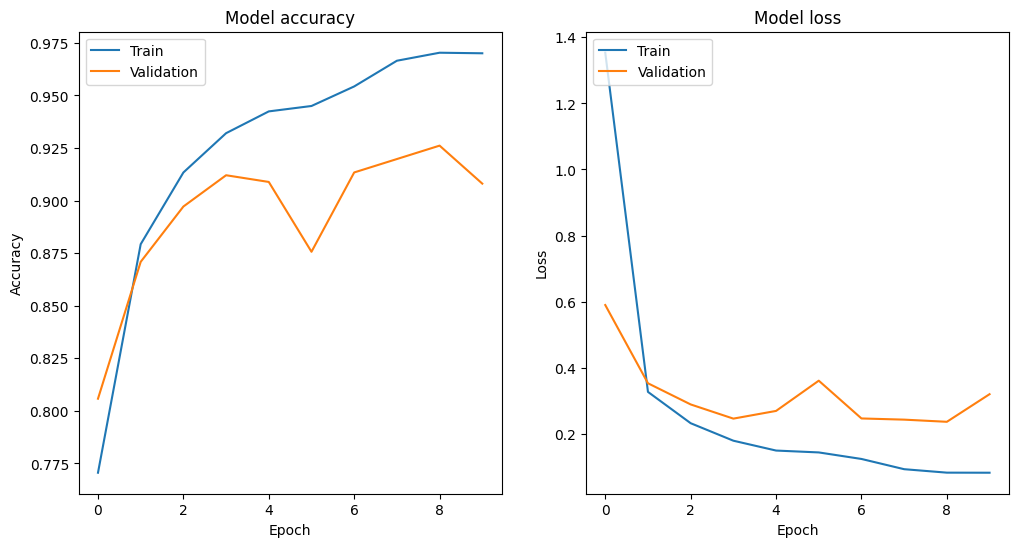

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

118/118 [==============================] - 14s 120ms/step - loss: 0.3330 - accuracy: 0.9065
Test accuracy: 0.906482458114624
Test loss: 0.3330422639846802


In [14]:
# Make predictions on the test set
y_pred_probs = model.predict(x_test)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)

118/118 [==============================] - 17s 116ms/step


In [15]:
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)


precision = precision_score(y_true, y_pred, average="weighted")


recall = recall_score(y_true, y_pred, average="weighted")


f1 = f1_score(y_true, y_pred, average="weighted")

In [16]:
print(f"Accuracy: {accuracy}")



print(f"Precision: {precision}")



print(f"Recall: {recall}")



print(f"F1 Score: {f1}")

Accuracy: 0.9064824654622742
Precision: 0.9153378970991859
Recall: 0.9064824654622742
F1 Score: 0.9068768275161061


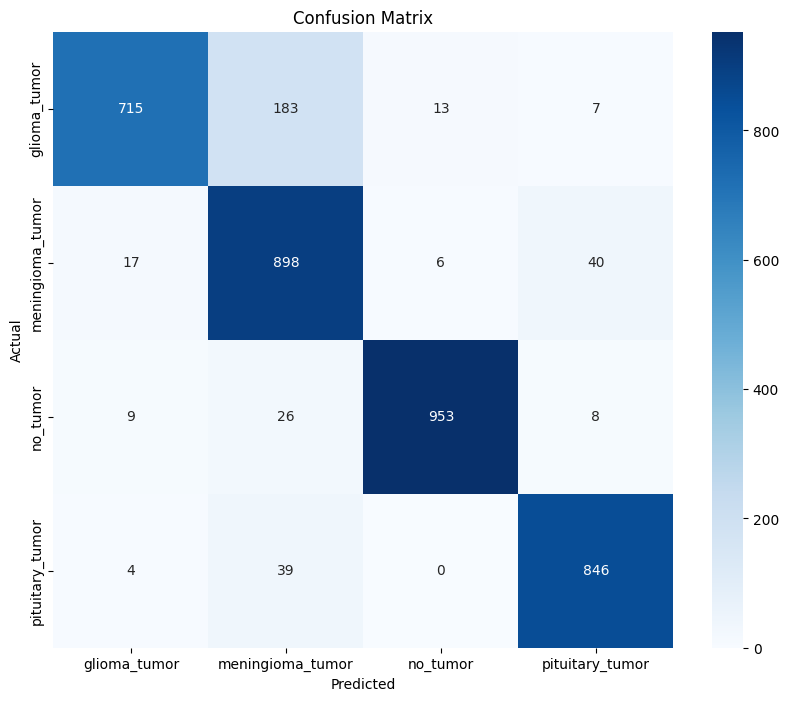

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=lb.classes_,
    yticklabels=lb.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
model_directory = "Models"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory, "ResNet101_02(150x150).h5")
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to Models\ResNet101_02(150x150).h5


In [ ]:
model = Sequential()
model.add(Input(shape=shape))

ResNettt101 = resnet.ResNet101(weights="imagenet", include_top=False, input_shape=shape)

model.add(ResNettt101)
model.add(GlobalMaxPooling2D())
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
)

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

In [ ]:
# Make predictions on the test set
y_pred_probs = model.predict(x_test)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, average="weighted")

recall = recall_score(y_true, y_pred, average="weighted")

f1 = f1_score(y_true, y_pred, average="weighted")
print(f"Accuracy: {accuracy}")

print(f"Precision: {precision}")

print(f"Recall: {recall}")

print(f"F1 Score: {f1}")

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=lb.classes_,
    yticklabels=lb.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model_directory = "Models"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory, "ResNet101_01(150x150).h5")
model.save(model_path)
print(f"Model saved to {model_path}")